In [1]:
import pandas as pd
import numpy as np
import json
import re
from llms import gemini
from llms import chatGPT
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
import plotly.express as px
from sklearn.manifold import TSNE
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib.utils import ImageReader
import plotly.io as pio


x_chat = chatGPT()
x_gemini = gemini()

In [16]:
df = pd.read_csv("../output/df_tsne.csv") #pd.read_csv("../output/bls_df.csv",index_col=0)

df.example_task_embedding = df.example_task_embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])
df.onet_task_embedding = df.onet_task_embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])
df.onet_title_embedding = df.onet_title_embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])

In [42]:
# activities_df = pd.read_csv("../input/onet/embeddings/activity_embeddings.csv")
# activities_df.embedding = activities_df.embedding.apply(lambda x: [float(y) for y in x.strip("[]").split(", ")])
# activity_embeddings = np.vstack(activities_df.embedding)
# task_embeddings = np.vstack(df.example_task_embedding)
# cosine_sim = cosine_similarity(task_embeddings, activity_embeddings, 'cosine')
# activities = list(activities_df.activity)
# df[activities] = cosine_sim
# skill_activity = pd.read_csv("../input/onet/Skills to Work Activities.csv")[["Work Activities Element Name","Skills Element Name"]]
# skill_activity.columns = ["activity","skill"]
# for group in skill_activity.groupby("skill"):
#     skill = group[0]
#     activities = group[1]["activity"].values
#     df[skill+"_task"] = df[activities].sum(axis=1)/len(activities)
# skills = list(skill_activity.skill.unique()+"_task")

In [19]:
# embeddings = np.vstack(df['example_task_embedding'].values)
# tsne = TSNE(n_components=3, perplexity=100, n_iter=1000)
# tsne_results = tsne.fit_transform(embeddings)
# df[["example_task_embedding_tsne1","example_task_embedding_tsne2"]] = tsne_results[:, [0,1]]


embeddings = np.vstack(df['onet_task_embedding'].values)
tsne = TSNE(n_components=3, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)
df[["onet_task_embedding_tsne1","onet_task_embedding_tsne2"]] = tsne_results[:, [0,1]]

embeddings = np.vstack(df['onet_title_embedding'].values)
tsne = TSNE(n_components=3, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)
df[["onet_title_embedding_tsne1","onet_title_embedding_tsne2"]] = tsne_results[:, [0,1]]



df.to_csv("../output/df_tsne.csv")

In [188]:
# occ_groups = list(df.groupby("Major Group Name")["organization_name"].count().sort_values(ascending=False).index)

# for value in activities:
#     for occ_group in occ_groups[:4]:
#         graph_df = df[df["Major Group Name"] == occ_group]
#         graph_df.head()
#         # Plot using Plotly with clusters
#         fig = px.scatter(graph_df, x='onet_task_embedding_tsne1', y='onet_task_embedding_tsne2',
#                          color=value,
#                          color_continuous_scale=px.colors.diverging.Tealrose,
#                          hover_data=['onet_task'],
#                          range_color=[0, .3],
#                          labels={value: 'Value'})
#         fig.update_traces(marker_size=10)                  
        
#         fig.update_layout(
#             title=f"{occ_group} {value}", 
#             hovermode='closest',
#             width=1000,  # Set the width of the figure
#             height=600  # Set the height of the figure
#         )
#         fig.show()

In [183]:
dwa = pd.read_csv("../input/onet/Tasks to DWAs.csv")
dwa = dwa[["DWA Title","DWA ID","Task"]]


In [163]:
dwa_ref = pd.read_csv("../input/onet/DWA Reference.csv")[["Element Name","DWA ID"]]
dwa_ref = dwa_ref.rename({"Element Name":"activity"},axis=1)

In [143]:
df = df.merge(dwa, on="Task",how="left")


In [194]:
tf = tf.merge(dwa_ref, on="DWA ID",how="left")

In [200]:
tf[tf["DWA Title"].isnull()]

organization name  number  \
15           LlamaIndex       1   
16              Norm AI       1   
20           Sixfold AI       1   
34        Guardrails AI       1   
35        Guardrails AI       1   
...                 ...     ...   
14043         DecoverAI       1   
14048       RENTERS.COM       1   
14057         THREEO AI       1   
14060         THREEO AI       1   
14063           Cpen AI       1   

                                                 Example  \
15     A data analyst uses LlamaIndex to build a know...   
16     A legal professional uses Norm AI to automate ...   
20     An insurance underwriter utilizes Sixfold AI t...   
34     A software developer uses Guardrails AI to aut...   
35     A software developer uses Guardrails AI to aut...   
...                                                  ...   
14043  A paralegal uses DecoverAI to automatically ex...   
14048  A landlord uses the platform to automatically ...   
14057  A manufacturing supervisor uses THREEO AI to p...   
14060  A manufacturing supervisor uses THREEO AI to p...   
14063  A user subscribes to Cpen AI's newsletter, whi...   

                                  example_task_embedding founded date  \
15     [-0.03467566892504692, -0.020547065883874893, ...   2023-01-01   
16     [-0.024047836661338806, -0.024579279124736786,...   2023-01-01   
20     [-0.020719492807984352, -0.009365797974169254,...   2023-01-01   
34     [-0.019347339868545532, 0.030410747975111008, ...   2023-01-01   
35     [-0.019347339868545532, 0.030410747975111008, ...   2023-01-01   
...                                                  ...          ...   
14043  [-0.017564138397574425, -0.033558715134859085,...   2024-04-04   
14048  [0.01917881891131401, -0.038043659180402756, -...   2024-04-12   
14057  [-0.022638604044914246, -0.005515134893357754,...   2024-04-19   
14060  [-0.022638604044914246, -0.005515134893357754,...   2024-04-19   
14063  [-0.00562838651239872, -0.0370476096868515, -0...   2024-04-22   

                  website                                    description_all  \
15     www.llamaindex.ai/  LlamaIndex is a simple, flexible data framewor...   
16           www.norm.ai/  Norm AI provides an AI-powered regulatory comp...   
20         www.sixfold.ai  Sixfold AI is an insurtech startup that levera...   
34       guardrailsai.com  Guardrails AI empowers humanity to harness the...   
35       guardrailsai.com  Guardrails AI empowers humanity to harness the...   
...                   ...                                                ...   
14043      www.decover.ai  Next generation research and eDiscovery platfo...   
14048     www.renters.com  Prioritizing the human experience for housing ...   
14057          threeo.ai/  Enterprise AI THREEO AI provides over 20 turnk...   
14060          threeo.ai/  Enterprise AI THREEO AI provides over 20 turnk...   
14063            cpen.ai/  Artificial Intelligence News, Trending AI Tool...   

                                       industries_parsed  \
15                                          ['Software']   
16     ['Compliance', 'Information Technology', 'Lega...   
20     ['Generative AI', 'InsurTech', 'Productivity T...   
34                                                    []   
35                                                    []   
...                                                  ...   
14043  ['Information Technology', 'Legal Tech', 'Soft...   
14048                       ['Insurance', 'Real Estate']   
14057                         ['Information Technology']   
14060                         ['Information Technology']   
14063                                  ['Generative AI']   

                                   generated_description  \
15     LlamaIndex is an open-source framework that al...   
16     Norm AI is a platform that leverages AI to aut...   
20     Sixfold AI is an insurtech company using gener...   
34     Guardrails AI develops tools that help users c...   
35   

In [184]:
grouped = dwa.groupby("Task").aggregate({"DWA ID":"count"}).apply(lambda x: 1/x).reset_index()
grouped = grouped.rename({"DWA ID":"dwa_count"},axis=1)
dwa = dwa.merge(grouped,on="Task")
tf = df.merge(dwa, on="Task",how="left")


In [195]:
tf

organization name  number  \
0                  Pika       1   
1                  Pika       1   
2                  Pika       1   
3                Sierra       1   
4          Essential AI       1   
...                 ...     ...   
14063           Cpen AI       1   
14064        Futureheal       1   
14065        Futureheal       1   
14066        Futureheal       1   
14067        Futureheal       1   

                                                 Example  \
0      A social media manager uses Pika to quickly ge...   
1      A social media manager uses Pika to quickly ge...   
2      A social media manager uses Pika to quickly ge...   
3      A customer service representative uses Sierra'...   
4      A marketing team uses Essential AI to generate...   
...                                                  ...   
14063  A user subscribes to Cpen AI's newsletter, whi...   
14064  A pediatrician uses Appai to analyze a child's...   
14065  A pediatrician uses Appai to analyze a child's...   
14066  A pediatrician uses Appai to analyze a child's...   
14067  A pediatrician uses Appai to analyze a child's...   

                                  example_task_embedding founded date  \
0      [-0.02056259848177433, 0.0018024604069069028, ...   2023-01-01   
1      [-0.02056259848177433, 0.0018024604069069028, ...   2023-01-01   
2      [-0.02056259848177433, 0.0018024604069069028, ...   2023-01-01   
3      [-0.010827294550836086, -0.031098157167434692,...   2023-01-01   
4      [0.002181823132559657, -0.020050395280122757, ...   2023-01-01   
...                                                  ...          ...   
14063  [-0.00562838651239872, -0.0370476096868515, -0...   2024-04-22   
14064  [-0.008862820453941822, 0.005576802417635918, ...   2024-04-24   
14065  [-0.008862820453941822, 0.005576802417635918, ...   2024-04-24   
14066  [-0.008862820453941822, 0.005576802417635918, ...   2024-04-24   
14067  [-0.008862820453941822, 0.005576802417635918, ...   2024-04-24   

                   website                                    description_all  \
0                 pika.art  Pika is a startup that develops an AI-powered ...   
1                 pika.art  Pika is a startup that develops an AI-powered ...   
2                 pika.art  Pika is a startup that develops an AI-powered ...   
3                sierra.ai  Sierra is an AI startup that tackles essential...   
4         www.essential.ai  Essential AI creates AI solutions that enhance...   
...                    ...                                                ...   
14063             cpen.ai/  Artificial Intelligence News, Trending AI Tool...   
14064  www.futureheal.com/  Futureheal Inc. revolutionizes pediatric care ...   
14065  www.futureheal.com/  Futureheal Inc. revolutionizes pediatric care ...   
14066  www.futureheal.com/  Futureheal Inc. revolutionizes pediatric care ...   
14067  www.futureheal.com/  Futureheal Inc. revolutionizes pediatric care ...   

                                       industries_parsed  \
0           ['Generative AI', 'Graphic Design', 'Video']   
1           ['Generative AI', 'Graphic Design', 'Video']   
2           ['Generative AI', 'Graphic Design', 'Video']   
3                        ['Enterprise Software', 'SaaS']   
4                 ['Information Technology', 'Software']   
...                                                  ...   
14063                                  ['Generative AI']   
14064  ['Child Care', 'Consulting', 'Health Care', 'H...   
14065  ['Child Care', 'Consulting', 'Health Care', 'H...   
14066  ['Child Care', 'Consulting', 'Health Care', 'H...   
14067  ['Child Care', 'Consulting', 'Health Care', 'H...   

                                   generated_description  \
0      Pika is an AI-powered platform that transforms...   
1      Pika is an AI-powered platform that transforms...   
2      Pika is an AI-powered platform that transforms...   
3      Sierra is an AI company that develops conversa

In [189]:
dwa.Task.value_counts()

Task
Compile, administer, and grade examinations, or assign this work to others.                                                                         99
Participate in student recruitment, registration, and placement activities.                                                                         68
Keep abreast of developments in the field by reading current literature, talking with colleagues, and participating in professional conferences.    58
Conduct research in a particular field of knowledge and publish findings in professional journals, books, or electronic media.                      58
Plan, evaluate, and revise curricula, course content, course materials, and methods of instruction.                                                 44
                                                                                                                                                    ..
Consult with a pathologist to determine a final diagnosis when abnormal cells are found. 

In [155]:
df.Task

0       Set up and operate computer editing systems, e...
1                   Program computerized graphic effects.
2       Confer with customers by telephone or in perso...
3       Write press releases or other media communicat...
4       Prepare or edit organizational publications, s...
                              ...                        
4283    Examine news items of local, national, and int...
4284    Determine a published or broadcasted story's e...
4285    Review and analyze facility activities and dat...
4286    Prepare activity reports to inform management ...
4287    Develop or expand and implement medical progra...
Name: Task, Length: 4288, dtype: object

In [198]:
element_counts = tf["activity"].value_counts()
colors = px.colors.qualitative.Plotly
color_map = {element: colors[i % len(colors)] for i, element in enumerate(element_counts.index)}
df['Color'] = tf['activity'].map(color_map)

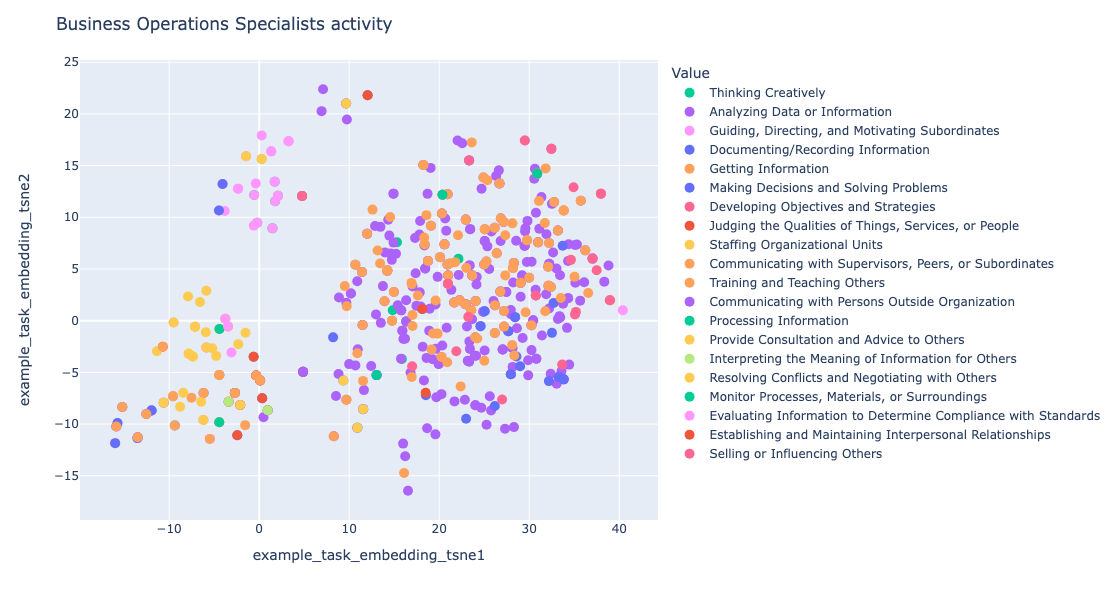

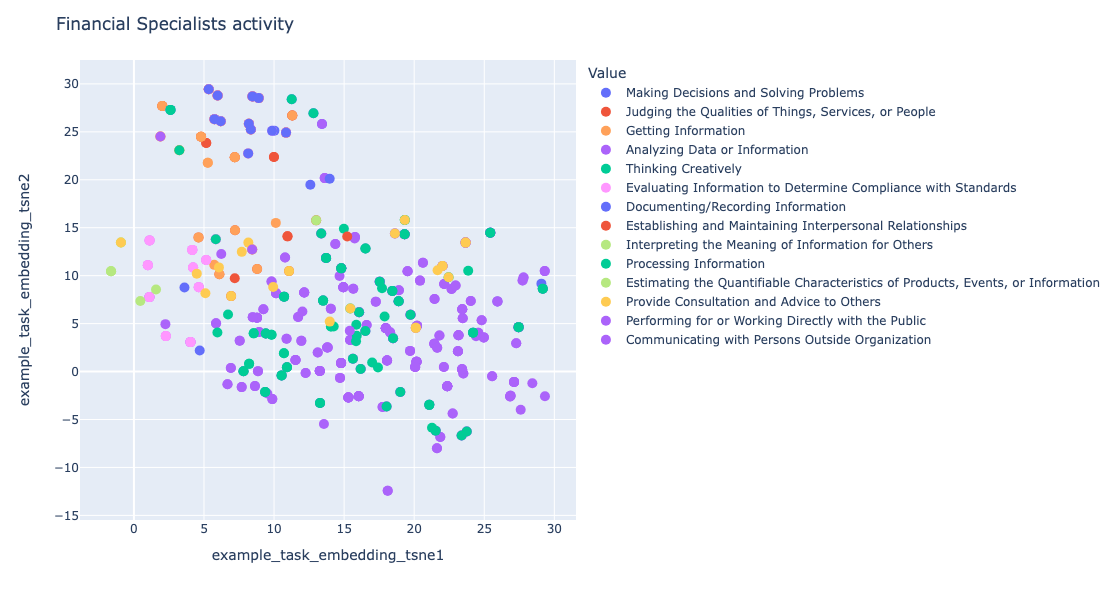

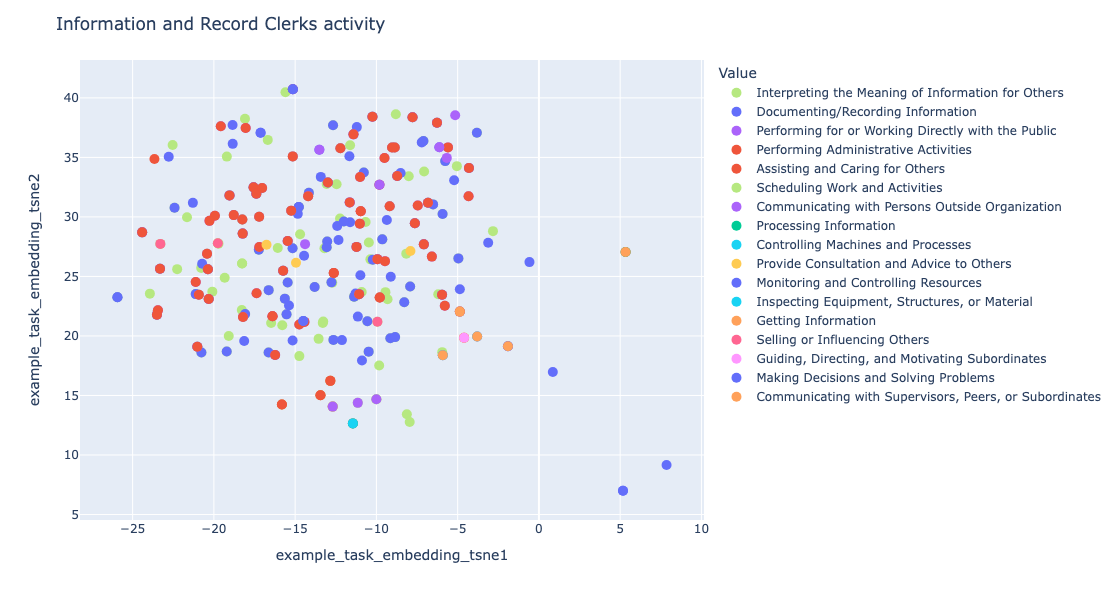

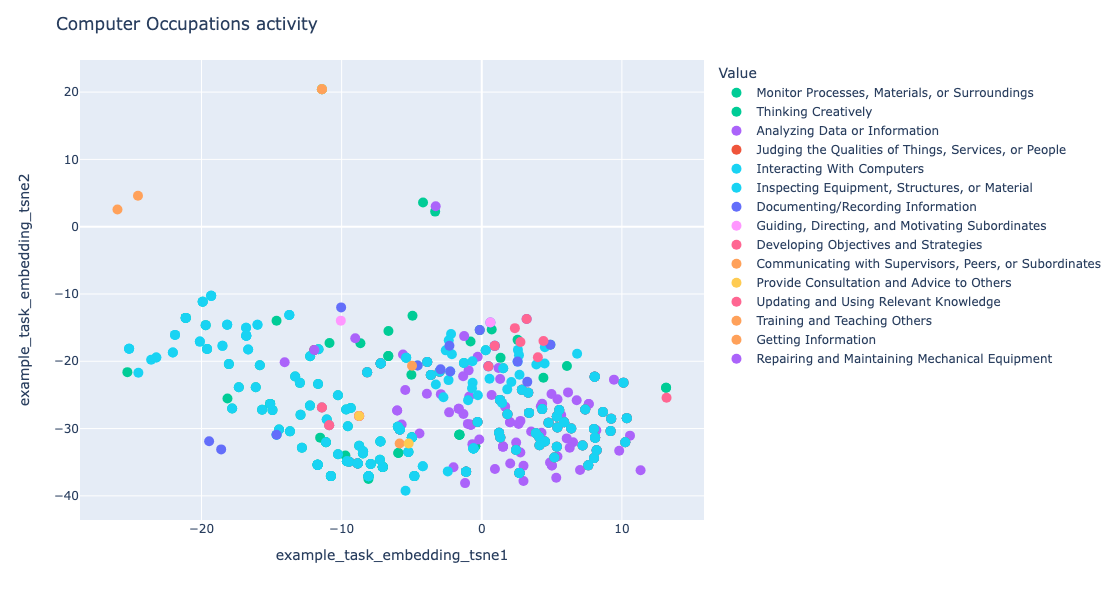

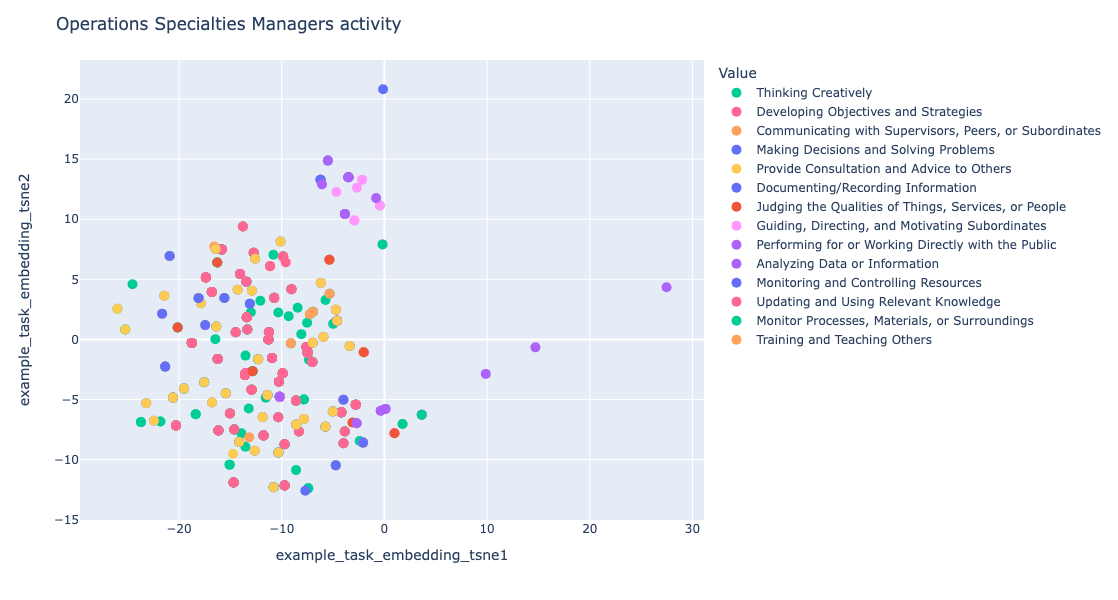

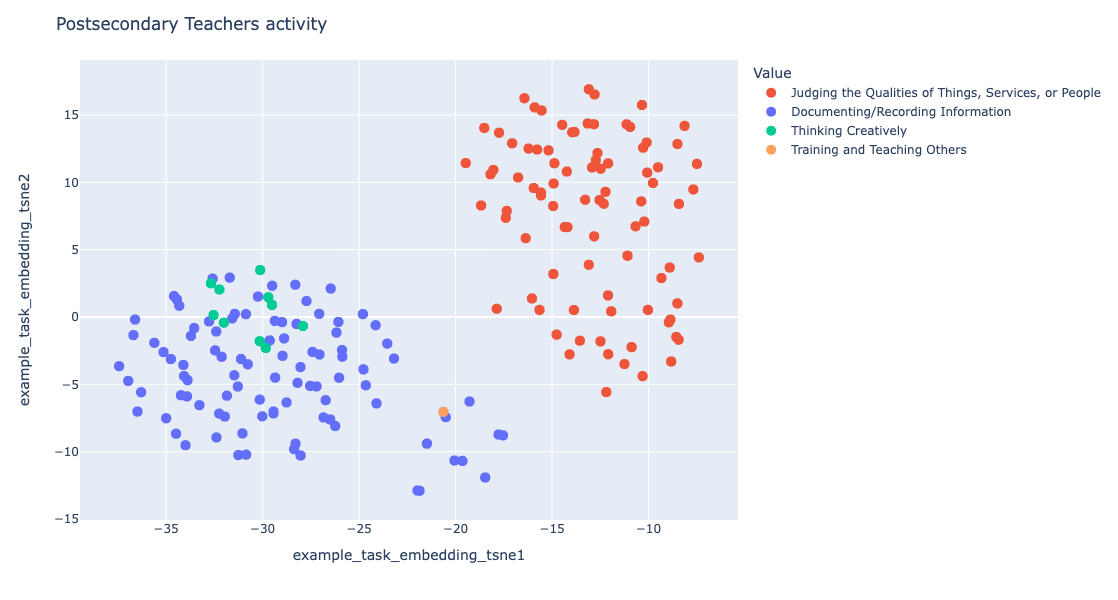

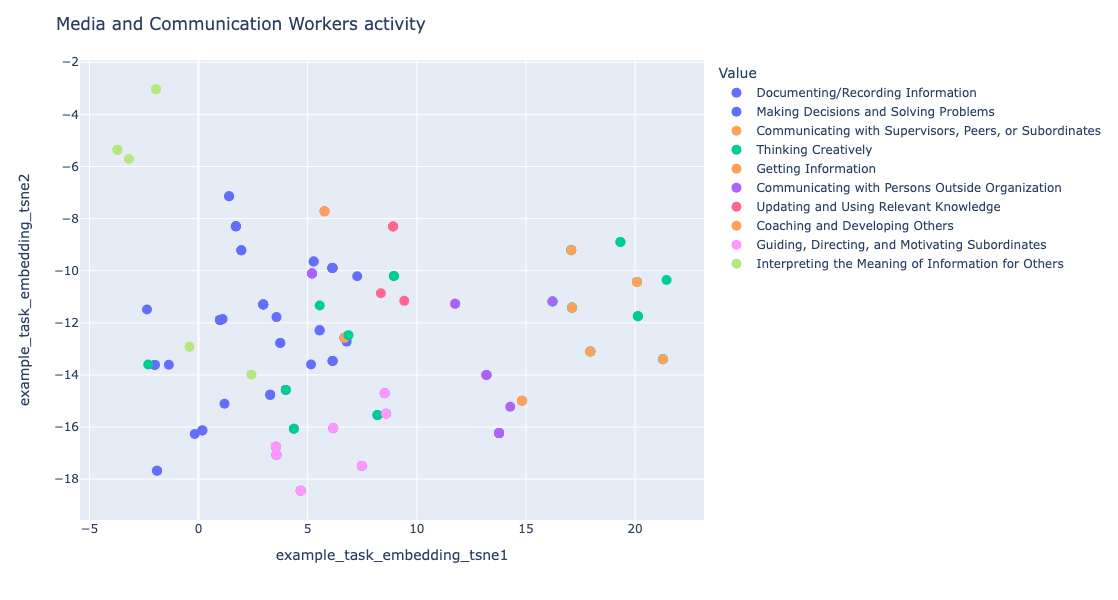

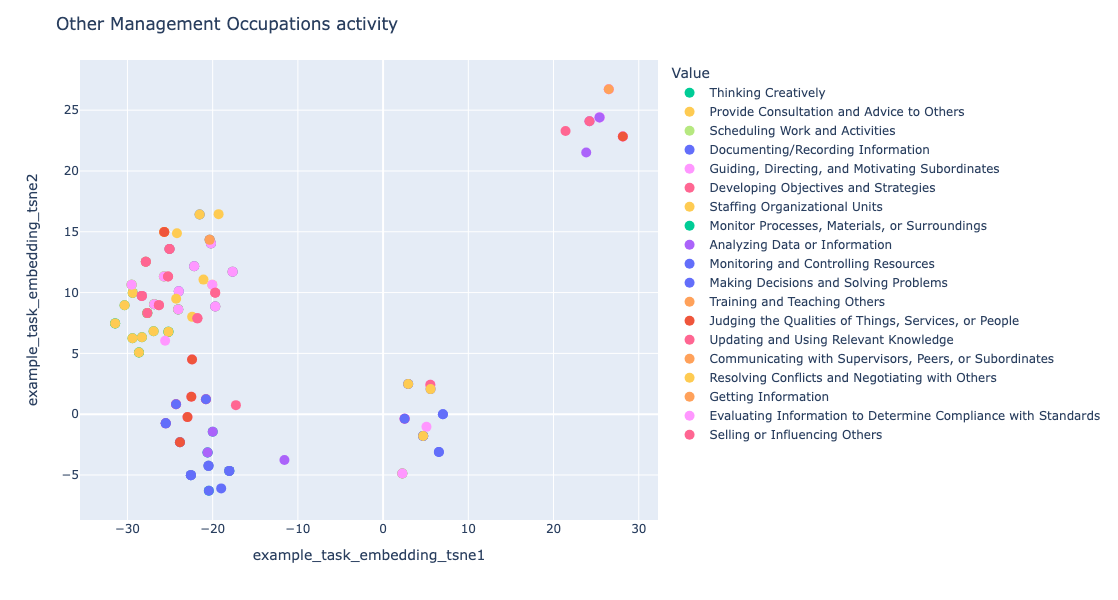

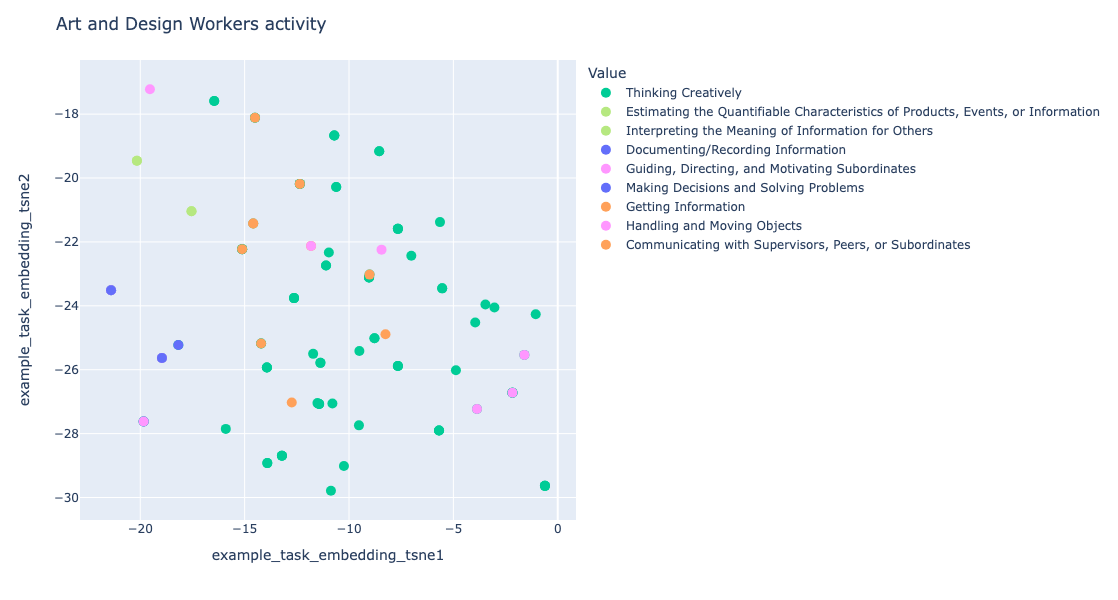

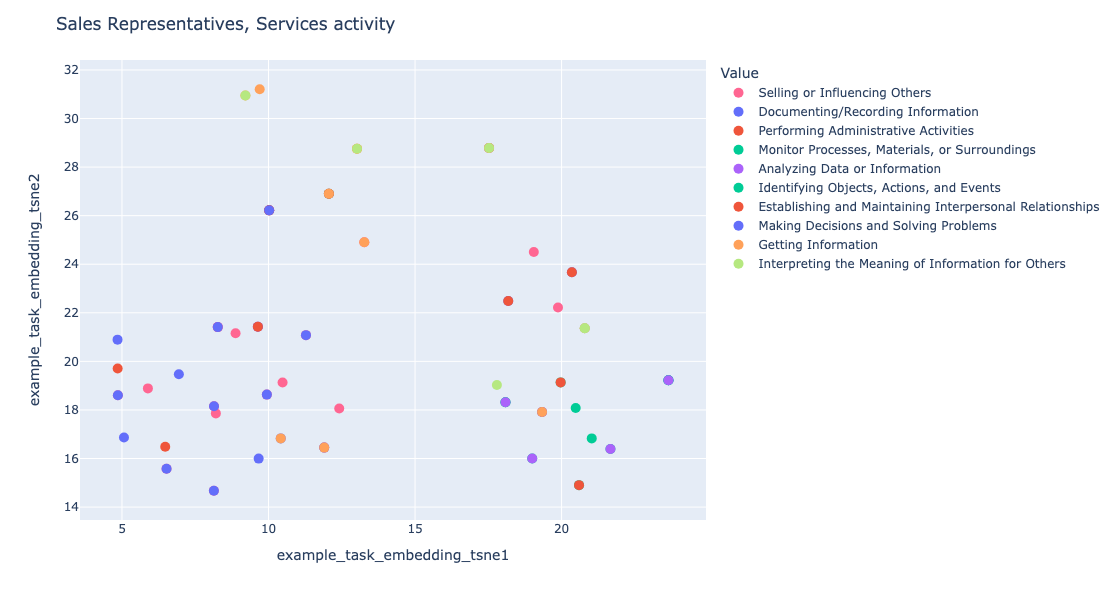

In [199]:
occ_groups = list(tf.groupby("Minor Group Name")["dwa_count"].sum().sort_values(ascending=False).index)

value = "activity"
for occ_group in occ_groups[:10]:
    graph_df = tf[tf["Minor Group Name"] == occ_group]
    graph_df.head()
    # Plot using Plotly with clusters
    fig = px.scatter(graph_df, x='example_task_embedding_tsne1', y='example_task_embedding_tsne2',
                     color=value,
                     hover_data=['onet_task'],
                     color_discrete_map=color_map,
                     range_color=[0, .3],
                     labels={value: 'Value'})
    fig.update_traces(marker_size=10)                  
    
    fig.update_layout(
        title=f"{occ_group} {value}", 
        hovermode='closest',
        width=1000,  # Set the width of the figure
        height=600  # Set the height of the figure
    )
    fig.show()

In [98]:
len(lf["DWA ID"].unique())

517

In [89]:
len(pd.read_csv("../input/onet/Tasks to DWAs.csv")["DWA Title"].unique())

2070

In [134]:
len(df)

14068

In [6]:
dwa = pd.read_csv("../input/onet/task to dwa 2022.csv")[3:].reset_index(drop=True)
dwa.columns = ["Type","ID","Task","linkages"]

dwa["DWA ID"] = "N/A"
current_dwa_id = None
for index, row in dwa.iterrows():
    if row['Type'] == 'DWA':
        current_dwa_id = row['ID']
    else:
        dwa.at[index, 'DWA ID'] = current_dwa_id

# Print the updated DataFrame
dwa.head()

Type                 ID                                               Task  \
0  NaN              4.A.1  Information Input – Where and how are the info...   
1  NaN            4.A.1.a  Looking for and Receiving Job-Related Informat...   
2  GWA          4.A.1.a.1  Getting Information – Observing, receiving, an...   
3  IWA      4.A.1.a.1.I01             Study details of artistic productions.   
4  DWA  4.A.1.a.1.I01.D01                    Review art or design materials.   

          linkages DWA ID  
0              NaN   None  
1              NaN   None  
2  Work Activities   None  
3              NaN   None  
4    Tasks to DWAs    N/A

In [7]:
dwa = dwa[dwa["Type"]=="Task Example"][["Task","ID","DWA ID"]]
dwa = dwa.rename({"ID":"Task ID"},axis=1)
grouped = dwa.groupby("Task").aggregate({"DWA ID":"count"}).apply(lambda x: 1/x).reset_index()
grouped = grouped.rename({"DWA ID":"dwa_count"},axis=1)
dwa = dwa.merge(grouped,on="Task")

Task ID
22935    5
22938    4
21489    4
22847    4
22838    4
        ..
10613    1
12747    1
10594    1
12737    1
15626    1
Name: count, Length: 17117, dtype: int64

In [13]:
tf = df.merge(dwa,on="Task ID",how="left")
tf[tf["DWA ID"].isnull()]

AttributeError: 'NoneType' object has no attribute 'merge'

In [ ]:
- socio economic status 
- hourly annual 
- pew research center website socio economic data
- location of jobs
- related occupation, group by most links
https://www.bls.gov/oes/tables.htm